In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
Cab_Data = pd.read_csv('Cab_Data.csv')
Customer_ID  = pd.read_csv('Customer_ID.csv')
City = pd.read_csv('City.csv')
Transaction_ID = pd.read_csv('Transaction_ID.csv')

In [179]:
df1 = Cab_Data.merge(Transaction_ID,  on= 'Transaction ID')
df2 = df1.merge(Customer_ID, on= 'Customer ID' )
data_origin = pd.merge(df2, City, on='City')

## CLEANING



In [180]:
data_origin.rename(columns={'Date of Travel': 'Travel_Date',
                   'KM Travelled': 'KM_Travelled',
                   'Price Charged': 'Price_Charged',
                   'Income (USD/Month)': 'Monthly_Income'}, inplace=True)

In [181]:

data_origin['Travel_Date'] = pd.to_datetime(
    data_origin['Travel_Date'], unit='D', origin='1899-12-30')

In [182]:
data_origin['Date'] = data_origin['Travel_Date'].dt.date
data_origin['Month'] = data_origin['Travel_Date'].dt.month
data_origin['Day'] = data_origin['Travel_Date'].dt.day_name()


In [183]:
data_origin['Cust_Loyalty'] = data_origin.groupby(
    'Customer ID')['Transaction ID'].transform('count')

data_origin['Distance_Category'] = pd.cut(data_origin['KM_Travelled'], 
                                          bins=[0, 5, 15, float('inf')], 
                                          labels=['Short', 'Medium', 'Long'])



data_origin['Age_Groups'] = pd.cut(data_origin['Age'], bins=[
    -float('inf'), 18, 35, 60 ,float('inf')], 
                          labels=['<18', '18-34', '35-59' ,'60+'])

In [184]:
data_origin['Population'] = data_origin['Population'].str.replace(
    ',', '').astype(float)
data_origin['Users'] = data_origin['Users'].str.replace(
    ',', '').astype(float)


In [185]:
df = data_origin.copy()


In [186]:
df.drop(['Unnamed: 0', 'Travel_Date'], axis=1, inplace=True)


In [187]:
df.duplicated().sum()

0

In [188]:
df.isna().sum()

Transaction ID       0
Company              0
City                 0
KM_Travelled         0
Price_Charged        0
Cost of Trip         0
Customer ID          0
Payment_Mode         0
Gender               0
Age                  0
Monthly_Income       0
Population           0
Users                0
Date                 0
Month                0
Day                  0
Cust_Loyalty         0
Distance_Category    0
Age_Groups           0
dtype: int64

## Data exploration

### Transaction Analysis


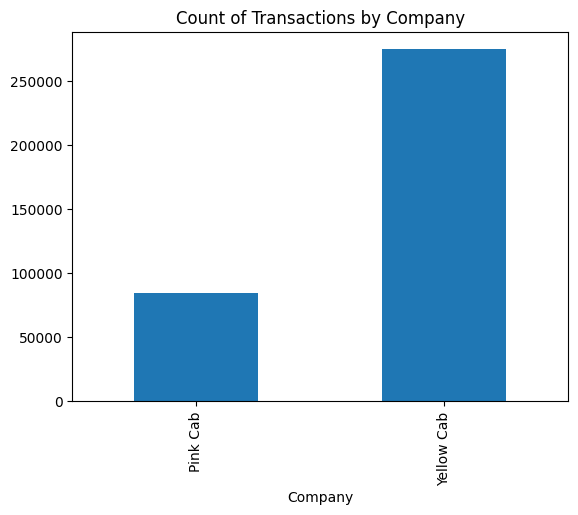

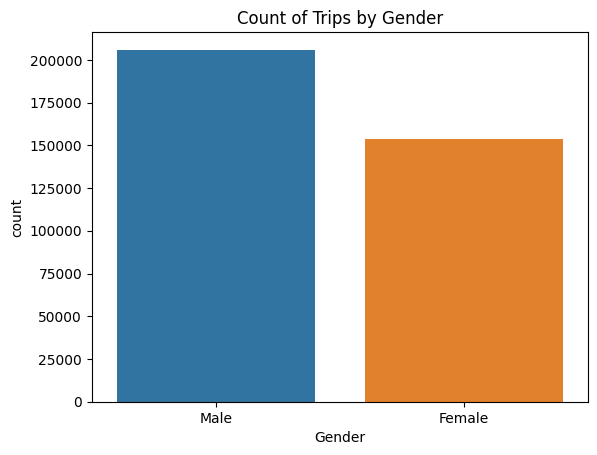

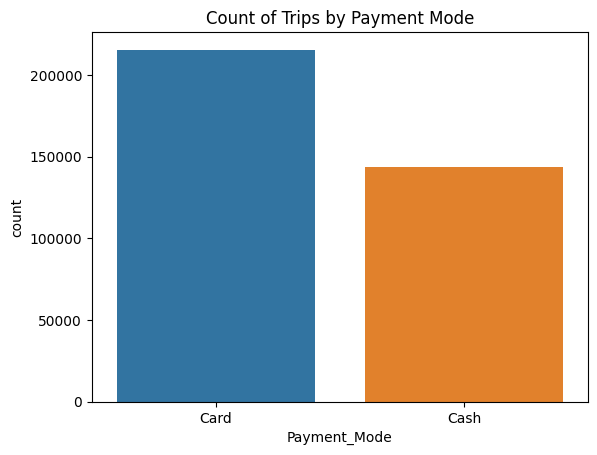

In [189]:
df.groupby('Company')['Transaction ID'].count().plot(kind='bar')
plt.title('Count of Transactions by Company')
plt.show()

sns.countplot(x='Gender', data=df)
plt.title('Count of Trips by Gender')
plt.show()



sns.countplot(x='Payment_Mode', data=df)
plt.title('Count of Trips by Payment Mode')
plt.show()




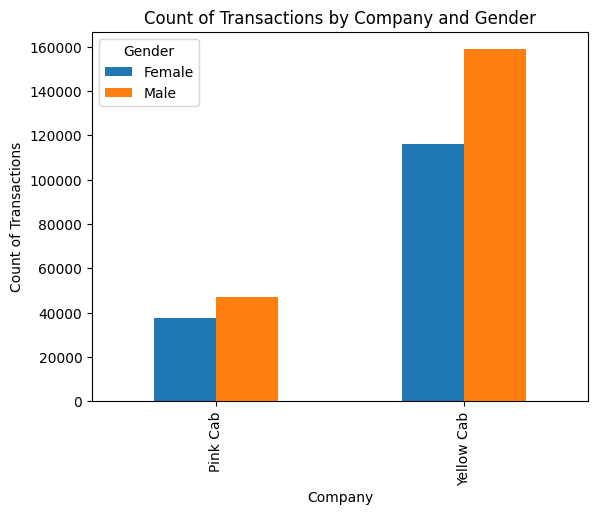

In [190]:
df.groupby(['Company', 'Gender'])['Transaction ID'].count().unstack().plot(kind='bar')
plt.xlabel('Company')
plt.ylabel('Count of Transactions')
plt.title('Count of Transactions by Company and Gender')
plt.show()

### Temporal Analysis


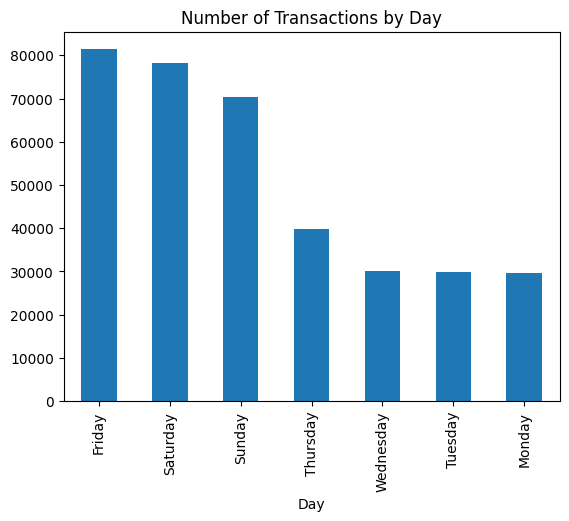

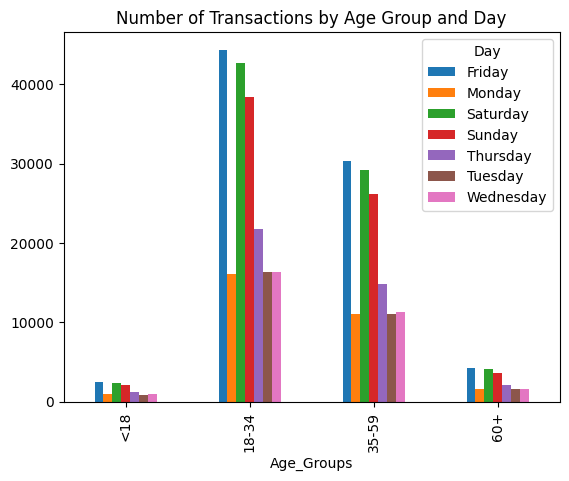

In [191]:
df.groupby('Day').size().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Number of Transactions by Day')
plt.show()

df.groupby(['Age_Groups', 'Day'])['Transaction ID'].size().unstack().plot(kind='bar')
plt.title('Number of Transactions by Age Group and Day')
plt.show()



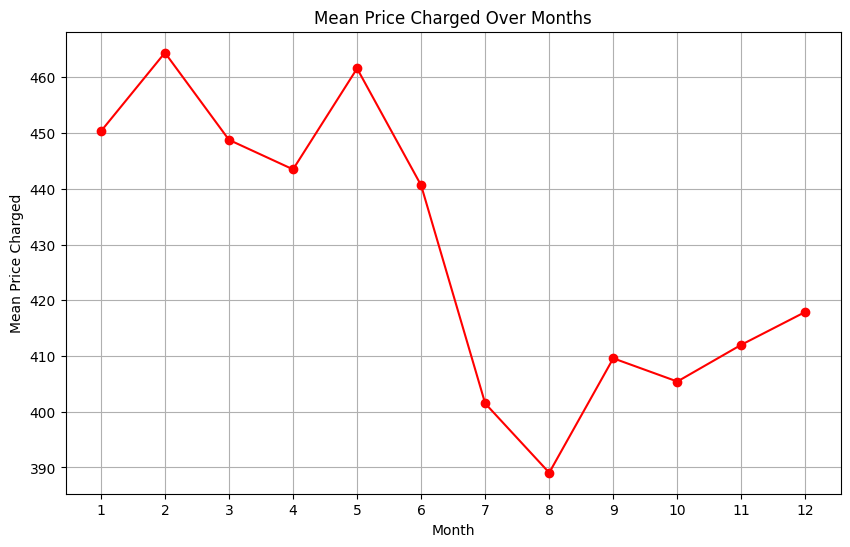

In [192]:
monthly_mean_price = df.groupby('Month')['Price_Charged'].mean()

plt.figure(figsize=(10, 6))
monthly_mean_price.plot(kind='line', marker='o', color='red')
plt.title('Mean Price Charged Over Months')
plt.xlabel('Month')
plt.ylabel('Mean Price Charged')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

## Distribution Analysis


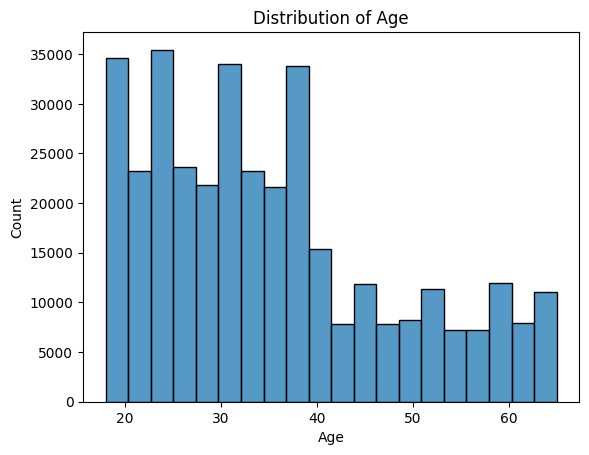

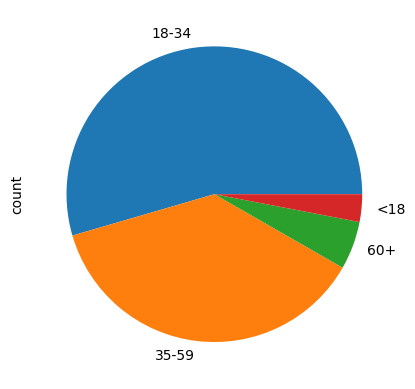

In [193]:
sns.histplot(x='Age', data=df, bins=20)
plt.title('Distribution of Age')
plt.show()

df['Age_Groups'].value_counts().sort_values(ascending = False).plot(kind = 'pie')
plt.show()

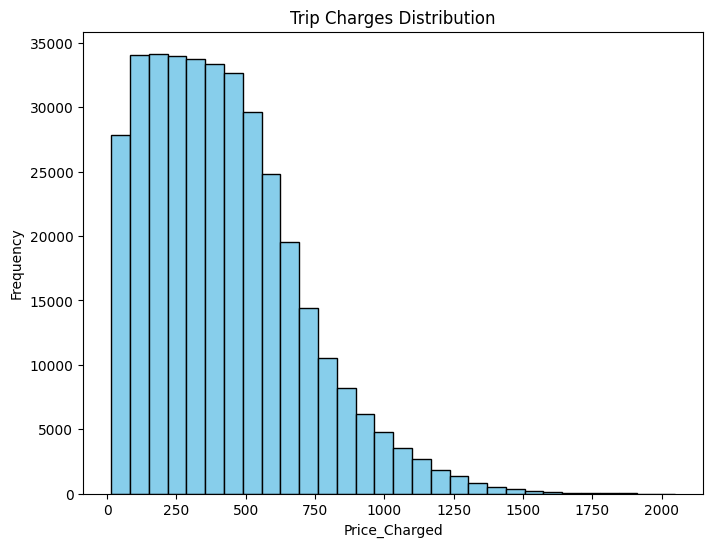

In [194]:
plt.figure(figsize=(8, 6))
plt.hist(df['Price_Charged'], bins=30, color='skyblue', edgecolor='black')
plt.title('Trip Charges Distribution')
plt.xlabel('Price_Charged')
plt.ylabel('Frequency')
plt.show()

## Relationship Analysis


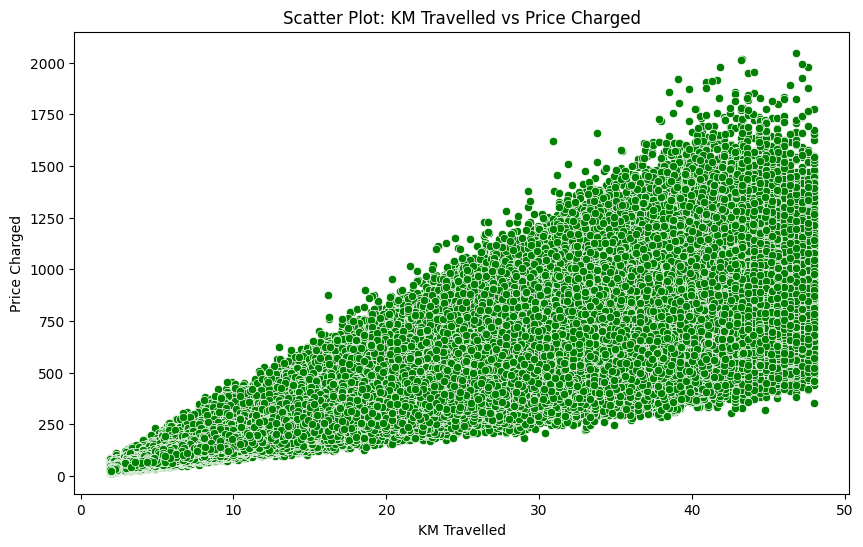

In [195]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='KM_Travelled', y='Price_Charged', data=df, color='green')
plt.title('Scatter Plot: KM Travelled vs Price Charged')
plt.xlabel('KM Travelled')
plt.ylabel('Price Charged')
plt.show()

In [196]:
df.groupby('City').size().sort_values(ascending = False)

City
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
dtype: int64

# Finds



Most popular company: Yellow Cab.

More trips by gender:	Male.

Most popular payment mode:	Card.

Highest number of transactions by day:	Friday.

Highest average monthly price charged:	February.

Lowest average monthly price charged:	Augusto

### Machine Learning

In [197]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [198]:
X = df[['KM_Travelled']]  
y = df['Cost of Trip']

model = LinearRegression()
model.fit(X, y)
predic = model.predict(X)
predic

array([386.14636715, 332.12792637, 539.5790276 , ..., 297.51047488,
       350.00726945, 434.20502691])

In [199]:
# Evaluating the model
mse = mean_squared_error(y, predic)
print("Mean Squared Error:", mse)

Mean Squared Error: 897.9742429708771


## ML App Link


https://capstone-1x3l.onrender.com